## Reading the dataset

### Importing Libraries, Reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Project data.csv")

In [3]:
df

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [4]:
df1=df["DEXINUS"].fillna(0)
df1.head(40)

0     8.02
1     8.02
2     8.00
3     8.01
4     8.00
5     8.00
6     8.00
7     8.00
8     8.00
9     8.00
10    8.01
11    8.01
12    8.01
13    8.00
14    8.00
15    8.00
16    8.00
17    8.00
18    8.00
19    8.01
20    8.00
21    8.00
22    8.00
23    8.00
24    7.97
25    8.00
26    8.00
27    8.01
28    8.01
29    0.00
30    0.00
31    0.00
32    7.58
33    7.58
34    0.00
35    7.58
36    7.58
37    7.58
38    7.58
39    7.55
Name: DEXINUS, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  12649 non-null  object 
 1   DEXINUS           12155 non-null  float64
dtypes: float64(1), object(1)
memory usage: 197.8+ KB


In [6]:
df_drop=df.dropna()
df_drop

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


### Exploratory Data Analysis

In [7]:
df.describe()

,DEXINUS
count,12155.000000
mean,34.206133
std,21.089190
min,7.190000
25%,12.075000
50%,35.890000
75%,47.650000
max,76.950000


In [8]:
df.drop_duplicates()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [9]:
df.isnull().any()

observation_date    False
DEXINUS              True
dtype: bool

In [10]:
df.sum()

observation_date    1973-01-021973-01-031973-01-041973-01-051973-0...
DEXINUS                                                        415776
dtype: object

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

In [13]:
#There are 494 null values in the dataset and dataset type is float64 correctly.
#All these null values are mainly because of US holidays. 

In [14]:
df.shape

(12155, 2)

In [15]:
df_drop.shape

(12155, 2)

In [16]:
#Z SCORE TO FIND OURLIERS
def zscore(x):
    z = ((x-34.30)/21.11)
    return z

In [17]:
zscore(df['DEXINUS'])

0       -1.244908
1       -1.244908
2       -1.245855
3       -1.245381
4       -1.245855
           ...   
12644    1.889152
12645    1.898153
12646    1.886784
12647    1.887257
12648    1.887257
Name: DEXINUS, Length: 12155, dtype: float64

In [18]:
#check z score over 3 and -3 for outliers
X = zscore(df['DEXINUS'])
for i in X:
    if i>3 or i<-3:
        print(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x18f41ff7670>,
 'caps': [<matplotlib.lines.Line2D at 0x18f41ff7d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f41ff72e0>],
 'medians': [<matplotlib.lines.Line2D at 0x18f42009430>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f42009790>],
 'means': []}

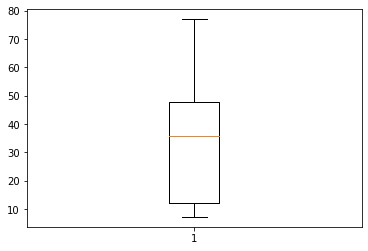

In [19]:
# to find outliers in the dataset
plt.boxplot(df['DEXINUS'])

<AxesSubplot:xlabel='DEXINUS'>

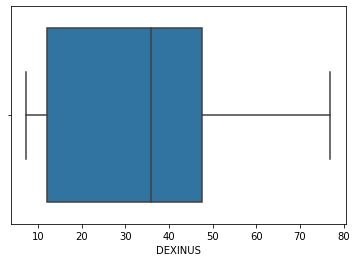

In [20]:
# Boxplot for ever
sns.boxplot("DEXINUS",data=df)

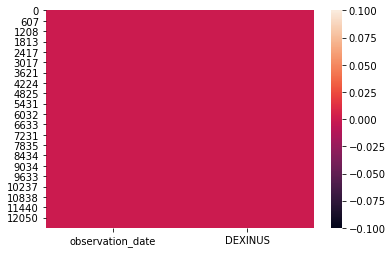

In [21]:
sns.heatmap(df.isnull())
plt.show()

# Data preprocessing¶

In [22]:
newdata = df.copy()

In [23]:
#convert object date to datetime format
df['month'] = pd.DatetimeIndex(df['observation_date']).month

In [24]:
df['year'] = pd.DatetimeIndex(df['observation_date']).year

In [25]:
df.head()

,observation_date,DEXINUS,month,year
0,1973-01-02,8.02,1,1973
1,1973-01-03,8.02,1,1973
2,1973-01-04,8.00,1,1973
3,1973-01-05,8.01,1,1973
4,1973-01-08,8.00,1,1973


In [26]:
df1=df.drop('observation_date',axis=1)

In [27]:
df1

,DEXINUS,month,year
0,8.02,1,1973
1,8.02,1,1973
2,8.00,1,1973
3,8.01,1,1973
4,8.00,1,1973
...,...,...,...
12644,74.18,6,2021
12645,74.37,6,2021
12646,74.13,6,2021
12647,74.14,6,2021


# Data Visualization

### Plotting the time-series

In [28]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

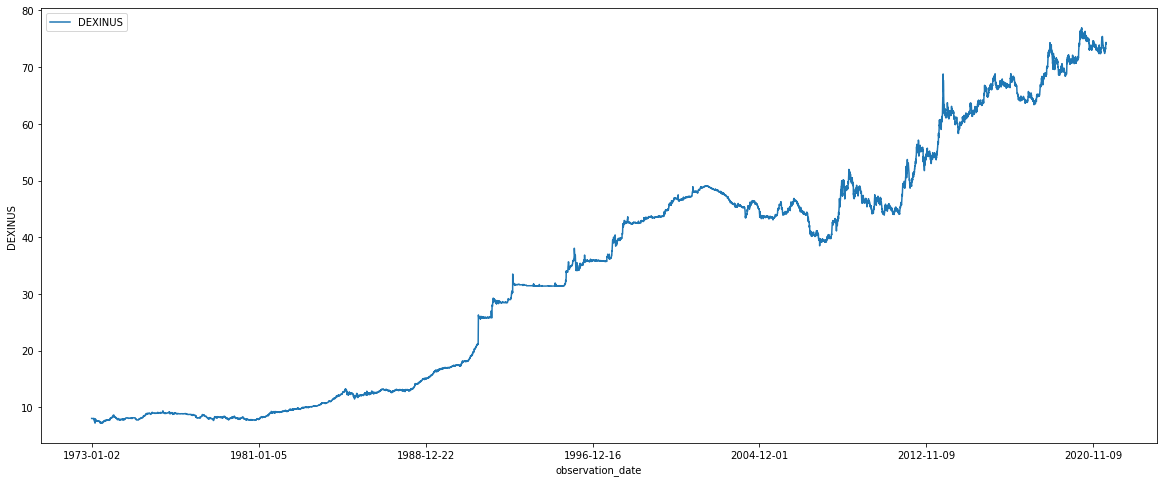

In [29]:
plt.figure(figsize=(20,8))
plt.xlabel("observation_date")
plt.ylabel("DEXINUS")
ax=plt.gca()
df.plot(kind='line',x='observation_date',y='DEXINUS',ax=ax)
plt.show()

## Checking stationarity of data

In [30]:
#Tests to check data is stationary or not 
#MEAN AND VARIANCE CHECK

In [31]:
from pandas import read_csv
X=pd.read_csv('Project data.csv', header=0, index_col=0, squeeze=True) 
split =round (len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=15.740580, mean2=52.632230
variance1=86.669465, variance2=122.265393


In [32]:
#we can see the mean and variance look very different 
#We have a non-stationary time series

In [33]:
#ADF(Augmented Dickey-Fuller) TEST
#Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
#Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [34]:
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [35]:
from statsmodels.tsa.stattools import adfuller
X=df['DEXINUS']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.627202
p-value: 0.988267
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [36]:
#we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

# Time series decomposition plot

### The logarithm of the series is decomposed into trend, seasonality and residual.

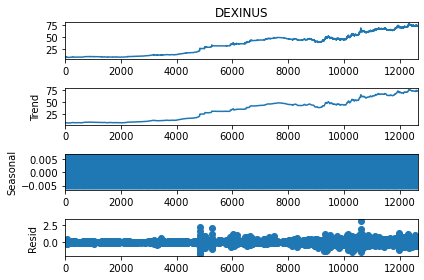

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add=seasonal_decompose(df.DEXINUS,freq=12)
decompose_ts_add.plot()
plt.show()

# ACF & PACF PLOT

### Determine time lags

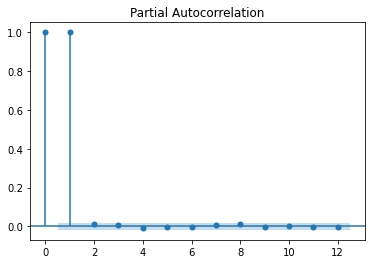

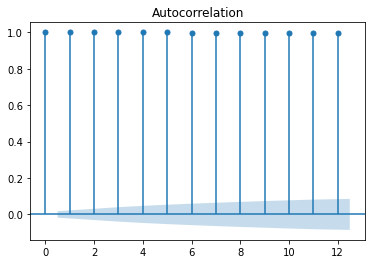

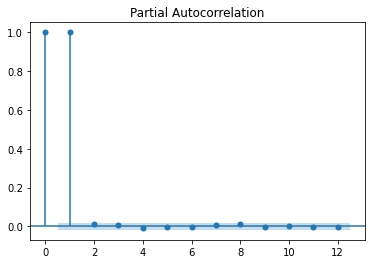

In [38]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.DEXINUS,lags=12)
tsa_plots.plot_pacf(df.DEXINUS,lags=12)


# Splitting data

In [39]:
date = pd.date_range(start='2/01/1973', end='25/06/2021', freq='M')
date

DatetimeIndex(['1973-02-28', '1973-03-31', '1973-04-30', '1973-05-31',
               '1973-06-30', '1973-07-31', '1973-08-31', '1973-09-30',
               '1973-10-31', '1973-11-30',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', length=580, freq='M')

In [40]:
train= df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [41]:
train.shape

(8508, 4)

In [42]:
train.tail()

,observation_date,DEXINUS,month,year
8846,2006-11-29,44.54,11,2006
8847,2006-11-30,44.59,11,2006
8848,2006-12-01,44.50,12,2006
8849,2006-12-04,44.49,12,2006
8850,2006-12-05,44.42,12,2006


In [43]:
test.shape

(3647, 4)

In [44]:
test.head()

,observation_date,DEXINUS,month,year
8851,2006-12-06,44.60,12,2006
8852,2006-12-07,44.52,12,2006
8853,2006-12-08,44.53,12,2006
8854,2006-12-11,44.69,12,2006
8855,2006-12-12,44.70,12,2006


### Building various exponential smoothing models on the training data and evaluate the model using RMSE on the test data

### MODEL 1-LINEAR REGRESSION

### For this particular linear regression, we are going to regress the 'DEXINUS' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [45]:
date = pd.date_range(start='2/01/1973', end='25/06/2021', freq='M')
date

DatetimeIndex(['1973-02-28', '1973-03-31', '1973-04-30', '1973-05-31',
               '1973-06-30', '1973-07-31', '1973-08-31', '1973-09-30',
               '1973-10-31', '1973-11-30',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', length=580, freq='M')

In [46]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+8508 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [47]:

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
   observation_date  DEXINUS  month  year  time
0       1973-01-02     8.02      1  1973     1
1       1973-01-03     8.02      1  1973     2
2       1973-01-04     8.00      1  1973     3
3       1973-01-05     8.01      1  1973     4
4       1973-01-08     8.00      1  1973     5 

Last few rows of Training Data 
      observation_date  DEXINUS  month  year  time
8846       2006-11-29    44.54     11  2006  8504
8847       2006-11-30    44.59     11  2006  8505
8848       2006-12-01    44.50     12  2006  8506
8849       2006-12-04    44.49     12  2006  8507
8850       2006-12-05    44.42     12  2006  8508 

First few rows of Test Data 
      observation_date  DEXINUS  month  year  time
8851       2006-12-06    44.60     12  2006  8508
8852       2006-12-07    44.52     12  2006  8509
8853       2006-12-08    44.53     12  2006  8510
8854       2006-12-11    44.69     12  2006  8511
8855       2006-12-12    44.70     12  2006  8512 

Last few rows o

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['DEXINUS'].values)

LinearRegression()

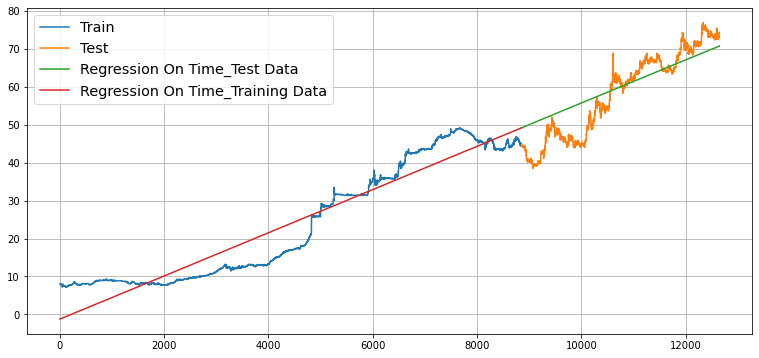

In [52]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
x=pd.to_datetime(df['observation_date'], format='%Y-%m-%d')
y=df['DEXINUS'].values.reshape(-1, 1)
plt.figure(figsize=(13,6))
plt.plot(train['DEXINUS'], label='Train')
plt.plot(test['DEXINUS'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

## Model1 Evaluation (Linear Regression)

In [53]:
## Defining the functions for calculating the accuracy metrics.

In [54]:
import sklearn.metrics as metrics

In [55]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [56]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['DEXINUS'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['DEXINUS'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 4.698 MAPE is 16.77


In [57]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['DEXINUS'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['DEXINUS'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 5.661 MAPE is 7.94


In [58]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94


## Model 2: Naive Approach

### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.¶

NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['DEXINUS'])[len(np.asarray(train['DEXINUS']))-1]
NaiveModel_train['naive'].head()

NameError: name 'NaiveModel_train' is not defined

In [61]:
NaiveModel_test['naive'] = np.asarray(train['DEXINUS'])[len(np.asarray(train['DEXINUS']))-1]
NaiveModel_test['naive'].head()

NameError: name 'NaiveModel_test' is not defined

In [62]:

plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['DEXINUS'], label='Train')
plt.plot(test['DEXINUS'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();
plt.show()

NameError: name 'NaiveModel_train' is not defined

<Figure size 864x576 with 0 Axes>

## Model2 Evaluation (Naive Approach)

In [63]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['DEXINUS'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['DEXINUS'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

NameError: name 'NaiveModel_train' is not defined

In [64]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['DEXINUS'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['DEXINUS'],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))


NameError: name 'NaiveModel_test' is not defined

In [65]:
resultsDf_2 = pd.DataFrame({'Model': 'NaiveModel', 
                                                      
                            'Test RMSE': [rmse_model2_test],
                            'Test MAPE': [mape_model2_test]},index=['Model 2'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

NameError: name 'rmse_model2_test' is not defined

##  Model 3: Simple Average

### For this particular simple average method, we will forecast by using the average of the training values

In [66]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [67]:
## Let us get the average of  the training set.

SimpleAverage_train['mean_forecast'] = train['DEXINUS'].mean()
SimpleAverage_train.head()

,observation_date,DEXINUS,month,year,mean_forecast
0,1973-01-02,8.02,1,1973,23.97144
1,1973-01-03,8.02,1,1973,23.97144
2,1973-01-04,8.00,1,1973,23.97144
3,1973-01-05,8.01,1,1973,23.97144
4,1973-01-08,8.00,1,1973,23.97144


In [68]:
SimpleAverage_test['mean_forecast'] = train['DEXINUS'].mean()
SimpleAverage_test.head()

,observation_date,DEXINUS,month,year,mean_forecast
8851,2006-12-06,44.60,12,2006,23.97144
8852,2006-12-07,44.52,12,2006,23.97144
8853,2006-12-08,44.53,12,2006,23.97144
8854,2006-12-11,44.69,12,2006,23.97144
8855,2006-12-12,44.70,12,2006,23.97144


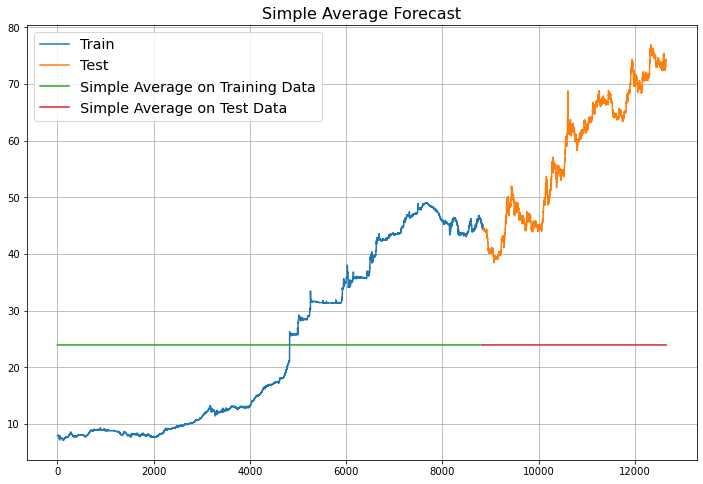

In [69]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['DEXINUS'], label='Train')
plt.plot(SimpleAverage_test['DEXINUS'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

## Model3 Evaluation (Simple Average)

In [70]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['DEXINUS'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['DEXINUS'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 15.281 MAPE is 59.51


In [71]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['DEXINUS'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['DEXINUS'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 35.868 MAPE is 58.73


In [72]:
resultsDf_3 = pd.DataFrame({'Model': 'SimpleAverage', 
                            
                            'Test RMSE': [rmse_model3_test],
                            'Test MAPE': [mape_model3_test]}
                           ,index=['Model 3'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73


## Model 4: Moving Average(MA)

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
### For Moving Average, we are going to average over the entire data.

In [73]:
MovingAverage = df.copy()
MovingAverage.head()

,observation_date,DEXINUS,month,year
0,1973-01-02,8.02,1,1973
1,1973-01-03,8.02,1,1973
2,1973-01-04,8.00,1,1973
3,1973-01-05,8.01,1,1973
4,1973-01-08,8.00,1,1973


In [74]:
MovingAverage['Trailing_2'] = MovingAverage['DEXINUS'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['DEXINUS'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['DEXINUS'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['DEXINUS'].rolling(9).mean()

MovingAverage.head()

,observation_date,DEXINUS,month,year,Trailing_2,Trailing_4,Trailing_6,Trailing_9
0,1973-01-02,8.02,1,1973,NaN,NaN,NaN,NaN
1,1973-01-03,8.02,1,1973,8.020,NaN,NaN,NaN
2,1973-01-04,8.00,1,1973,8.010,NaN,NaN,NaN
3,1973-01-05,8.01,1,1973,8.005,8.0125,NaN,NaN
4,1973-01-08,8.00,1,1973,8.005,8.0075,NaN,NaN


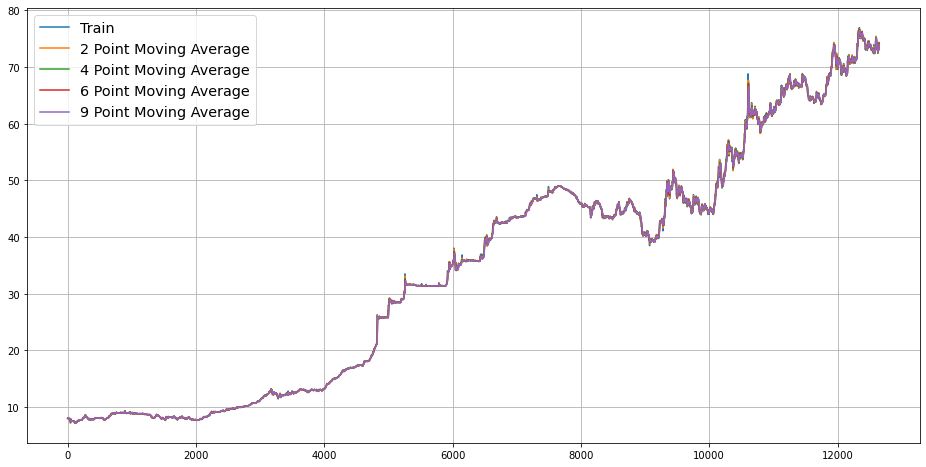

In [75]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['DEXINUS'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();


In [76]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(df)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(df)*0.7):]

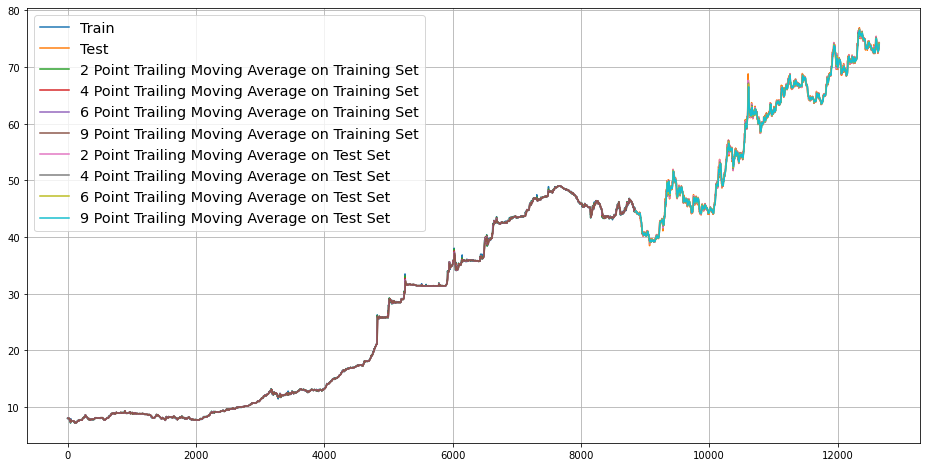

In [77]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['DEXINUS'], label='Train')
plt.plot(trailing_MovingAverage_test['DEXINUS'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();


In [78]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['DEXINUS'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['DEXINUS'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['DEXINUS'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['DEXINUS'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['DEXINUS'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['DEXINUS'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['DEXINUS'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['DEXINUS'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 0.143 MAPE is 0.17
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 0.258 MAPE is 0.31
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 0.335 MAPE is 0.40
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 0.433 MAPE is 0.52


In [79]:
resultsDf_4 = pd.DataFrame({'Model': ['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'],    
                            'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['Model 4.1','Model 4.2'
                                   ,'Model 4.3','Model 4.4'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73
Model 4.1,2pointTrailingMovingAverage,0.143383,0.17
Model 4.2,4pointTrailingMovingAverage,0.257618,0.31
Model 4.3,6pointTrailingMovingAverage,0.335305,0.40
Model 4.4,9pointTrailingMovingAverage,0.433009,0.52


## Model 5: Automated ARIMA model

In [80]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p =  range(0, 3)
q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (2, 1, 0)
Model: (2, 1, 1)


In [81]:
ARIMA_train = train.copy()
ARIMA_test = test.copy()

In [82]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [83]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train['DEXINUS'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:-14286.504124420051
ARIMA(0, 1, 1) - AIC:-14349.04838415969
ARIMA(1, 1, 0) - AIC:-14358.228949958033
ARIMA(1, 1, 1) - AIC:-14380.127212128999
ARIMA(2, 1, 0) - AIC:-14394.700351614298
ARIMA(2, 1, 1) - AIC:-14392.916787417515


In [84]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
4,"(2, 1, 0)",-14394.700352
5,"(2, 1, 1)",-14392.916787
3,"(1, 1, 1)",-14380.127212
2,"(1, 1, 0)",-14358.228950
1,"(0, 1, 1)",-14349.048384
0,"(0, 1, 0)",-14286.504124


In [85]:
## ARIMA(2,1,0) has the lowest AIC
mod = ARIMA(ARIMA_train['DEXINUS'], order=(2,1,0))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:              D.DEXINUS   No. Observations:                 8507
Model:                 ARIMA(2, 1, 0)   Log Likelihood                7201.350
Method:                       css-mle   S.D. of innovations              0.104
Date:                Wed, 25 Aug 2021   AIC                         -14394.700
Time:                        00:07:04   BIC                         -14366.506
Sample:                             1   HQIC                        -14385.079
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0043      0.001      3.877      0.000       0.002       0.006
ar.L1.D.DEXINUS    -0.0866      0.011     -8.010      0.000      -0.108      -0.065
ar.L2.D.DEXINUS     0.0672      

In [86]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA[0]

array([44.42975576, 44.42857086, 44.43369086, ..., 60.01639392,
       60.02067263, 60.02495134])

In [87]:
#Test data RMSE and MAPE
from math import sqrt
from sklearn.metrics import  mean_squared_error
RMSE_autoARIMA = sqrt(mean_squared_error(ARIMA_test.DEXINUS,predicted_autoARIMA[0]))
MAPE_autoARIMA = MAPE(ARIMA_test.DEXINUS,predicted_autoARIMA[0])


print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 9.014677444600498 
MAPE for the autofit ARIMA model: 13.21


In [88]:
resultsDf_5= pd.DataFrame({'Model':'autoARIMA(2,1,0)', 'Test RMSE': RMSE_autoARIMA,'Test MAPE': MAPE_autoARIMA }
                           ,index=['Model 5'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73
Model 4.1,2pointTrailingMovingAverage,0.143383,0.17
Model 4.2,4pointTrailingMovingAverage,0.257618,0.31
Model 4.3,6pointTrailingMovingAverage,0.335305,0.40
Model 4.4,9pointTrailingMovingAverage,0.433009,0.52
Model 5,"autoARIMA(2,1,0)",9.014677,13.21


## Model6:Feedforward Neural Network (FNN)

In [89]:
train_size = int(np.floor(len(data1)*0.9))
data1 = rate_data_log.values
train = list(data1[0:train_size])
test = list(data1[train_size:])

NameError: name 'data1' is not defined

In [90]:
rate_data_log=np.log(df['DEXINUS'])

In [91]:
def gen_XY(t_list,size):
    '''
    Generates an autoregressive lagged array.
    
    Parameters
    ----------
    1. t_list: (list) Data to generate an autoregressive array out of.
    2. size: (int) Number of lagged values to consider.
    
    Returns
    ----------
    1. X: (np.ndarray) Autoregressive feature array.
    2. Y.T: (np.ndarray) Column array with values of response variable.
    
    '''
    X = np.zeros([1,size])
    Y = []
    temp_list=[]
    for i in range(len(t_list)-size):
        add_list = t_list[i:i+size]
        target = t_list[i+size]
        X = np.append(X,np.array([add_list]),axis=0)
        Y.append(target)
        
    X = np.delete(X,0,axis=0)
    Y = np.array(Y)
    
    return X,Y.T

In [92]:
X_train,y_train = gen_XY(train,1)
X_test,y_test = gen_XY(test,1)

KeyError: 1

In [93]:
from  keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras import layers
from keras.initializers import Zeros
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [94]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

NameError: name 'X_test' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error as RMSE
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(RMSE(np.exp(y_test), np.exp(y_pred))))

## Model 6.1: 2 Hidden Layers with 50 neurons each and ReLU activation function

In [95]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

NameError: name 'X_test' is not defined

In [96]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(RMSE(np.exp(y_test), np.exp(y_pred))))

NameError: name 'X_test' is not defined

## Model 6.2 : 4 Hidden Layers with 100 neurons each and ReLU activation function

In [97]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

NameError: name 'X_test' is not defined

In [98]:
from sklearn.metrics import mean_squared_error as RMSE

In [99]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('RMSE: %f'%(RMSE(np.exp(y_test), np.exp(y_pred))))


NameError: name 'X_test' is not defined

## Model 6.3: LSTM- Recurrent Neural Network (LSTM-RNN)¶

In [100]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

NameError: name 'X_train' is not defined

In [101]:
X_tr_t.shape

NameError: name 'X_tr_t' is not defined

In [102]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(10,input_shape=(1, X_train.shape[1]), activation='relu'))

model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

NameError: name 'X_train' is not defined

In [103]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

print("The RMSE on the Train set is:\t{:0.3f}".format(RMSE(np.exp(y_train), np.exp(y_train_pred_lstm))))
print("The RMSE on the Test set is:\t{:0.3f}".format(RMSE(np.exp(y_test), np.exp(y_pred_test_lstm))))

NameError: name 'X_tst_t' is not defined

In [104]:
plt.plot(np.exp(y_test), label='True')
plt.plot(np.exp(y_pred_test_lstm),'--',label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Day')
plt.ylabel('DEXINUS')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined

## Simple Exponenetial Smoothing

In [105]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [106]:
SES_train = train.copy()
SES_test = test.copy()

In [107]:
model_SES = SimpleExpSmoothing(SES_train['DEXINUS'])

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [108]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [109]:
model_SES_autofit.params

{'smoothing_level': 0.9204575341714881,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 8.019755071934272,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,observation_date,DEXINUS,month,year,predict
0,1973-01-02,8.02,1,1973,8.019755
1,1973-01-03,8.02,1,1973,8.019981
2,1973-01-04,8.00,1,1973,8.019998
3,1973-01-05,8.01,1,1973,8.001591
4,1973-01-08,8.00,1,1973,8.009331


In [111]:
len(SES_test)

3647

In [112]:
SES_test['predict'] = model_SES_autofit.forecast(len(SES_test))
SES_test.head()

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,observation_date,DEXINUS,month,year,predict
8851,2006-12-06,44.60,12,2006,44.425675
8852,2006-12-07,44.52,12,2006,44.425675
8853,2006-12-08,44.53,12,2006,44.425675
8854,2006-12-11,44.69,12,2006,44.425675
8855,2006-12-12,44.70,12,2006,44.425675


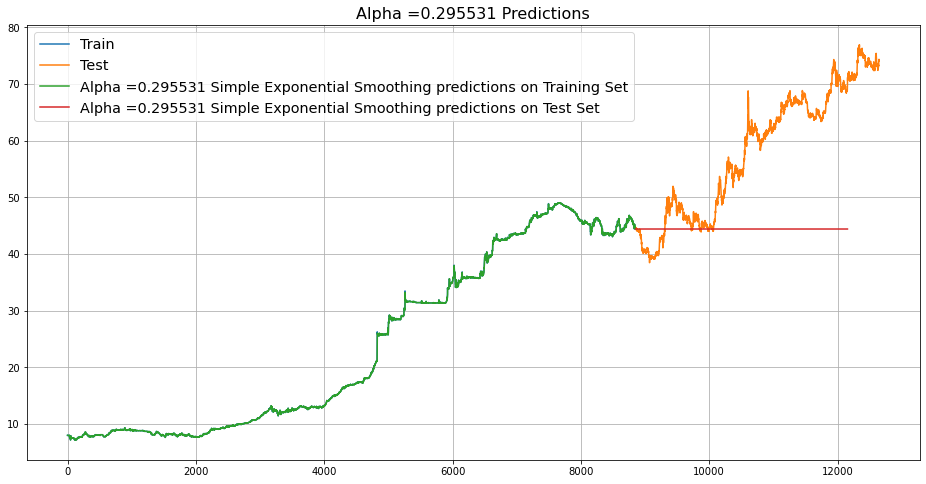

In [113]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['DEXINUS'], label='Train')
plt.plot(SES_test['DEXINUS'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.295531 Predictions');

In [114]:
## Training Data RMSE and MAPE

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['DEXINUS'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['DEXINUS'],SES_train['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 0.104 MAPE is 0.18


In [115]:
resultsDf_7 = pd.DataFrame({'Model': 'Alpha=0.295531,SimpleExponentialSmoothing','Test RMSE': [rmse_model5_train_1],'Test MAPE': [mape_model5_train_1]}
                           ,index=['Model 7'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73
Model 4.1,2pointTrailingMovingAverage,0.143383,0.17
Model 4.2,4pointTrailingMovingAverage,0.257618,0.31
Model 4.3,6pointTrailingMovingAverage,0.335305,0.40
Model 4.4,9pointTrailingMovingAverage,0.433009,0.52
Model 5,"autoARIMA(2,1,0)",9.014677,13.21
Model 7,"Alpha=0.295531,SimpleExponentialSmoothing",0.104171,0.18


## Double Exponential Smoothing

In [116]:
DES_train = train.copy()
DES_test = test.copy()

In [117]:
model_DES = Holt(DES_train['DEXINUS'])

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [118]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [119]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.916353,True
smoothing_trend,beta,0.001687,True
initial_level,l.0,8.019537,True
initial_trend,b.0,0.000278,True


In [120]:
test_predictions_model8 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model8.head()

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


8508    44.424825
8509    44.423761
8510    44.422697
8511    44.421633
8512    44.420569
dtype: float64

In [121]:
## Test Data - RMSE and MAPE

rmse_model8_test = metrics.mean_squared_error(DES_test['DEXINUS'],test_predictions_model8,squared=False)
mape_model8_test = MAPE(DES_test['DEXINUS'],test_predictions_model8)
print("For Alpha=0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model8_test, mape_model8_test))

For Alpha=0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is 19.785 MAPE is 28.05


In [122]:
resultsDf8 = pd.DataFrame({'Model': "Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",'Test RMSE': [rmse_model8_test],'Test MAPE': [mape_model8_test]}
                              ,index=['Model 8'])

resultsDf = pd.concat([resultsDf, resultsDf8])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73
Model 4.1,2pointTrailingMovingAverage,0.143383,0.17
Model 4.2,4pointTrailingMovingAverage,0.257618,0.31
Model 4.3,6pointTrailingMovingAverage,0.335305,0.40
Model 4.4,9pointTrailingMovingAverage,0.433009,0.52
Model 5,"autoARIMA(2,1,0)",9.014677,13.21
Model 7,"Alpha=0.295531,SimpleExponentialSmoothing",0.104171,0.18
Model 8,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",19.784751,28.05


## Triple Exponential Smoothing

In [123]:
TES_train = train.copy()
TES_test = test.copy()

In [124]:
model_TES = ExponentialSmoothing(TES_train['DEXINUS'])

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [125]:
model_TES_autofit = model_TES.fit()

In [126]:
model_TES_autofit.params

{'smoothing_level': 0.9204575341714881,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 8.019755071934272,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [127]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,observation_date,DEXINUS,month,year,auto_predict
0,1973-01-02,8.02,1,1973,8.019755
1,1973-01-03,8.02,1,1973,8.019981
2,1973-01-04,8.00,1,1973,8.019998
3,1973-01-05,8.01,1,1973,8.001591
4,1973-01-08,8.00,1,1973,8.009331


In [128]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=11)
TES_test.head()

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,observation_date,DEXINUS,month,year,auto_predict
8851,2006-12-06,44.60,12,2006,NaN
8852,2006-12-07,44.52,12,2006,NaN
8853,2006-12-08,44.53,12,2006,NaN
8854,2006-12-11,44.69,12,2006,NaN
8855,2006-12-12,44.70,12,2006,NaN


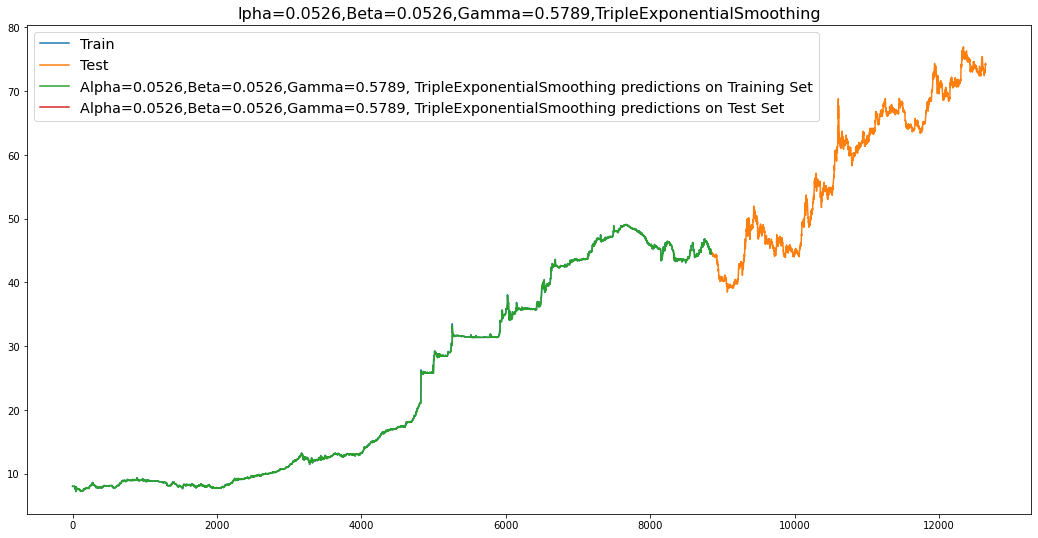

In [129]:
## Plotting on both the Training and Test using autofit
## lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train['DEXINUS'], label='Train')
plt.plot(TES_test['DEXINUS'], label='Test')


plt.plot(TES_train['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing')


plt.grid();


In [130]:
## Training Data

rmse_model9_train_1 = metrics.mean_squared_error(TES_train['DEXINUS'],TES_train['auto_predict'],squared=False)
mape_model9_train_1 = MAPE(TES_train['DEXINUS'],TES_train['auto_predict'])
print("For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model9_train_1, mape_model9_train_1))

For alpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 0.104 MAPE is 0.18


In [131]:
resultsDf9 = pd.DataFrame({'Model': ' alpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing','Test RMSE': [rmse_model9_train_1],'Test MAPE':[mape_model9_train_1]}
                           ,index=['Model 9'])

resultsDf = pd.concat([resultsDf, resultsDf9])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,5.660554,7.94
Model 3,SimpleAverage,35.868126,58.73
Model 4.1,2pointTrailingMovingAverage,0.143383,0.17
Model 4.2,4pointTrailingMovingAverage,0.257618,0.31
Model 4.3,6pointTrailingMovingAverage,0.335305,0.40
Model 4.4,9pointTrailingMovingAverage,0.433009,0.52
Model 5,"autoARIMA(2,1,0)",9.014677,13.21
Model 7,"Alpha=0.295531,SimpleExponentialSmoothing",0.104171,0.18
Model 8,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",19.784751,28.05
Model 9,"alpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleE...",0.104171,0.18


## Based on the model-building exercise, building the most optimum model on the complete data and predict 30 days into the future with 95% confidence interval

## Full Model - Triple Exponential Smoothing

In [132]:
model_DES_full = Holt(df['DEXINUS'])

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [133]:
fullmodel1 = model_DES_full.fit(smoothing_level=0.16,smoothing_slope=0.68,optimized=False,use_brute=True)

In [134]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['DEXINUS'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df['DEXINUS'],fullmodel1.fittedvalues)

print('Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)


Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE: 0.309693075950209 
MAPE: 0.49


In [135]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=2000)

C:\Users\Gitanjali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


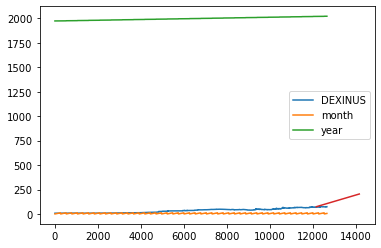

In [136]:
df.plot()
prediction_1.plot();

In [137]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
12155,-3.244533,74.652138,275.841078
12156,-3.179610,74.717062,275.906001
12157,-3.114687,74.781985,275.970924
12158,-3.049764,74.846908,276.035848
12159,-2.984841,74.911831,276.100771


Text(0.5, 1.0, 'Triple Exponential Smoothing 0.4,0.1,0.2')

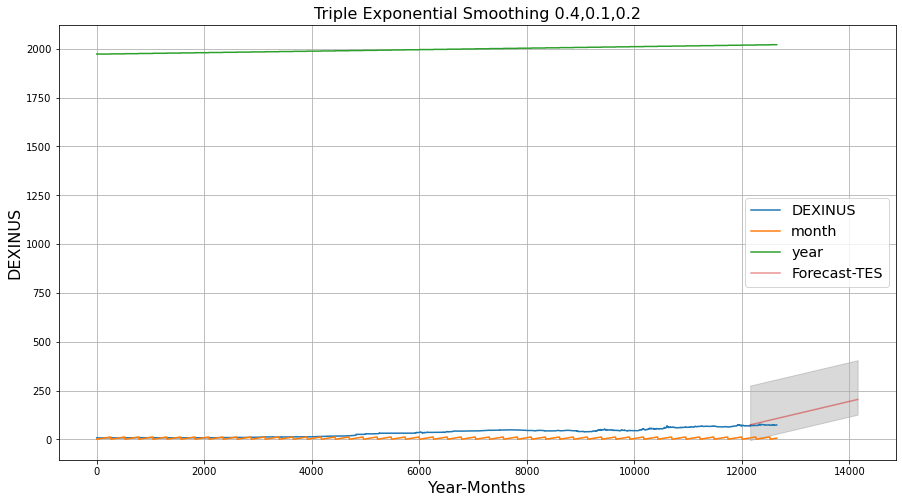

In [138]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast-TES', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('DEXINUS')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Triple Exponential Smoothing 0.4,0.1,0.2')

### INTRODUCING STATIONARITY

## Difference between data and moving average

### In this transformation, the trend is evaluated by subtracting rolling mean of data points over a specified time window from the original series.

In [139]:
# Calculate and plot the rolling mean

rolling_mean = pd.Series.rolling(df['DEXINUS'],window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
#rate_data.plot()
rmean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.grid()
plt.show()

NameError: name 'fig_size' is not defined

In [ ]:
# Subtract rolling mean from the data and plot

rolling_mean_diff=df['DEXINUS']-rolling_mean
#plt.rcParams["figure.figsize"] = fig_size
plt.plot(rolling_mean_diff, color='red',label='Difference between data and rolling mean')
plt.legend(loc='best')
plt.grid()
plt.show()
rolling_mean_diff.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
# ADF on transformed data
df_rmean_diff = adfuller(rolling_mean_diff, autolag='AIC')
result_rmean_diff = pd.Series(df_rmean_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_rmean_diff[4].items():
    result_rmean_diff['Critical Value (%s)'%key] = value
print (result_rmean_diff)

### Moving average of log(data)

### It is a very common practice to take the logarithmic transform of the data to compress possible deviations. Here, we take the logarithm of the data, calculate the rolling mean of the logarithm and subtract it from the logarithmic transform.

In [ ]:
# Calculate and plot logarithm of the data
rate_data_log=np.log(df['DEXINUS'])
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Calculate and plot differnece between rolling mean of logarithm and the logarithm
log_rolling_mean=pd.Series.rolling(rate_data_log,window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
log_rolmean_diff=rate_data_log-log_rolling_mean
log_rmean_diff= plt.plot(rolling_mean_diff, color='red', label='Rolling Mean of log')
plt.legend(loc='best')
plt.grid()
plt.show()
log_rolmean_diff.dropna(inplace=True)

In [ ]:
# Perform ADF on the transformation
df_test_log = adfuller(log_rolmean_diff, autolag='AIC')
result_log = pd.Series(df_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_log[4].items():
    result_log['Critical Value (%s)'%key] = value
print (result_log)

### Exponentially Weighted Moving Average of Log

### In this step, instead of taking the moving average, we take the exponentially weighted moving average and perform similar analysis

In [ ]:
ewma_data=pd.Series.ewm(rate_data_log,halflife=10,min_periods=0,adjust=True,ignore_na=False).mean()
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate EWMA and plot
plt.plot(ewma_data, color='red',label='EWMA')
plt.legend()
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
 #Calculate and plot difference

ewma_diff=rate_data_log-ewma_data
plt.rcParams["figure.figsize"] = fig_size
plt.plot(ewma_diff, color='red')
plt.grid()
plt.show()

In [ ]:
# Perform ADF test

df_test_ewma = adfuller(ewma_diff, autolag='AIC')
result_ewma = pd.Series(df_test_ewma[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_ewma[4].items():
    result_ewma['Critical Value (%s)'%key] = value
print (result_ewma)

### First order differencing

### First order differencing is probably the single most widely used transformation in time series. This transformation is taken by subtracting consecutive points of the series. Even though the first point is lost, this does not matter a lot given the length of the series.

In [ ]:
# Calculate and plot the first order differnece

rate_log_diff = rate_data_log - rate_data_log.shift()
rate_log_diff.dropna(inplace=True)
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Perform ADF test

df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

### Evidently, first order differencing gives the best smoothing to the data. It is very commonly used for making time series stationary because it seldom fails. However, we explored a few other smoothing techniques only to be sure. First order differencing is selected to transform the series.

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
import pickle as p
p_out  = open("model_DES_full", "wb")
p.dump(model_DES_full, p_out)
p_out.close()